___


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> `Roi Jared Flores Garza Stone` </Strong>
- <Strong> `Rafael Takata García` </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `roi.flores@iteso.mx` </font>
- <Strong> Email: </Strong>  <font color="blue"> `rafael.takata@iteso.mx` </font>
___




### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido sobre la preparación de datos y construcción de modelos predictivos tanto para problemas de regresión como de clasificación.  Se busca abordar la construcción de los modelos, fundamentar por medio de la comunicación de resultados, evaluación de las predicciones del modelo y la metodología establecida para la preparación de los datos. 


### Entrega 1:


# Regresión

### Definición del problema:

La NBA (National Basketball Association), fundada en 1946 en Estados Unidos, es ampliamente reconocida como la liga de baloncesto profesional más prestigiosa y competitiva del mundo. Con equipos distribuidos en ciudades de Estados Unidos y Canadá, la NBA ha atraído a los mejores jugadores de diversos países, convirtiéndose en un fenómeno global que trasciende fronteras y culturas.

Al igual que en otras ligas estadounidenses, la NBA registra meticulosamente estadísticas y datos de cada partido, lo que permite un análisis profundo del rendimiento de los jugadores, patrones de juego, y proyecciones sobre el éxito de los equipos. Esta abundancia de información es clave para optimizar estrategias, tomar decisiones y entender el impacto de cada jugador en la cancha.

En este análisis, utilizaremos los datos de la temporada 2023 para predecir la cantidad de puntos que anotarán los jugadores, una métrica fundamental para evaluar el rendimiento en el juego. El conjunto de datos se ha obtenido de Kaggle y puede consultarse en el siguiente enlace: [NBA Players Stats 2023 Season](https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season?resource=download).

##### Las variables que contiene el dataset son las siguientes:

| Descripción                                                                                       | Columna |
|--------------------------------------------------------------------------------------------------|---------|
| Nombre del jugador de baloncesto                                                                  | PName   |
| Posición del jugador en el juego, incluyendo 'N/A'                                               | POS     |
| Abreviatura del equipo para el cual el jugador juega en esta temporada                           | Team    |
| Edad del jugador                                                                                 | Age     |
| Número total de juegos que el jugador ha jugado esta temporada                                   | GP      |
| Número total de juegos ganados por el jugador                                                    | W       |
| Número total de juegos perdidos por el jugador                                                   | L       |
| Total de minutos jugados por el jugador en esta temporada                                        | Min     |
| Total de puntos anotados por el jugador [objetivo]                                               | PTS     |
| Total de tiros de campo acertados por el jugador                                                 | FGM     |
| Total de tiros de campo intentados por el jugador                                                | FGA     |
| Porcentaje de éxito en tiros de campo realizados por el jugador                                  | FG%     |
| Total de tiros de 3 puntos acertados por el jugador                                              | 3PM     |
| Total de tiros de 3 puntos intentados por el jugador                                             | 3PA     |
| Porcentaje de éxito en tiros de 3 puntos realizados por el jugador                               | 3P%     |
| Total de tiros libres acertados por el jugador                                                   | FTM     |
| Total de tiros libres intentados por el jugador                                                  | FTA     |
| Porcentaje de éxito en tiros libres realizados por el jugador                                    | FT%     |
| Total de rebotes ofensivos realizados por el jugador                                             | OREB    |
| Total de rebotes defensivos realizados por el jugador                                            | DREB    |
| Total de rebotes (ofensivos + defensivos) realizados por el jugador                              | REB     |
| Total de asistencias realizadas por el jugador                                                   | AST     |
| Total de pérdidas de balón realizadas por el jugador                                             | TOV     |
| Total de robos realizados por el jugador                                                         | STL     |
| Total de bloqueos realizados por el jugador                                                      | BLK     |
| Total de faltas personales realizadas por el jugador                                             | PF      |
| Total de puntos de fantasía de la NBA realizados por el jugador                                  | FP      |
| Total de dobles-dobles realizados por el jugador                                                 | DD2     |
| Total de triples-dobles realizados por el jugador                                                | TD3     |
| Diferencia total entre la puntuación del equipo del jugador y la del oponente mientras él juega  | +/-     |


##### Librerías a usar:

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import scipy.stats as stats


In [193]:
df = pd.read_csv('../docs/2023_nba_player_stats.csv')
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [195]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


Quitamos la variable objetivo y hacemos el train_test_split:

In [196]:
#Tambien eliminare el nombre del jugador y el equipo para evitar el sobreentreno
X = df.drop(['PTS', 'PName', 'Team'], axis = 1)
y = df['PTS']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=444)

In [198]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((431, 27), (431,), (108, 27), (108,))

Comenzamos con la exploración de datos:

In [199]:
X_train.isna().sum()

POS     5
Age     0
GP      0
W       0
L       0
Min     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
PF      0
FP      0
DD2     0
TD3     0
+/-     0
dtype: int64

Solamente tenemos N/As en la variable posición. 

In [200]:
X_train[X_train['POS'].isna()]

,POS,Age,GP,W,L,Min,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
534,NaN,23,1,1,0,5.3,0,0,0.0,0,...,1,0,2,0,0,1,-1,0,0,-5
535,NaN,29,2,1,1,6.5,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,5
538,NaN,28,4,2,2,24.4,0,4,0.0,0,...,8,2,0,3,0,4,22,0,0,-4
536,NaN,24,1,0,1,5.0,0,3,0.0,0,...,2,1,0,0,0,0,4,0,0,-2
537,NaN,20,1,1,0,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,-2


Estos datos nulos se deben a que los jugadores no tienen muchos minutos jugados en la temporada y no hay información suficiente como para asignarle una posición. Sin embargo, tras una investigación en internet podemos ver que todos pueden entrar como `F`

In [201]:
X_train['POS'] = X_train['POS'].fillna('F')
X_train['POS'].isnull().sum()

0

Ahora que no tenemos datos nulos, se utilizará un LabelEncoder para la posición.

In [202]:
le = LabelEncoder()

In [203]:
X_train['POS'] = le.fit_transform(X_train['POS'])

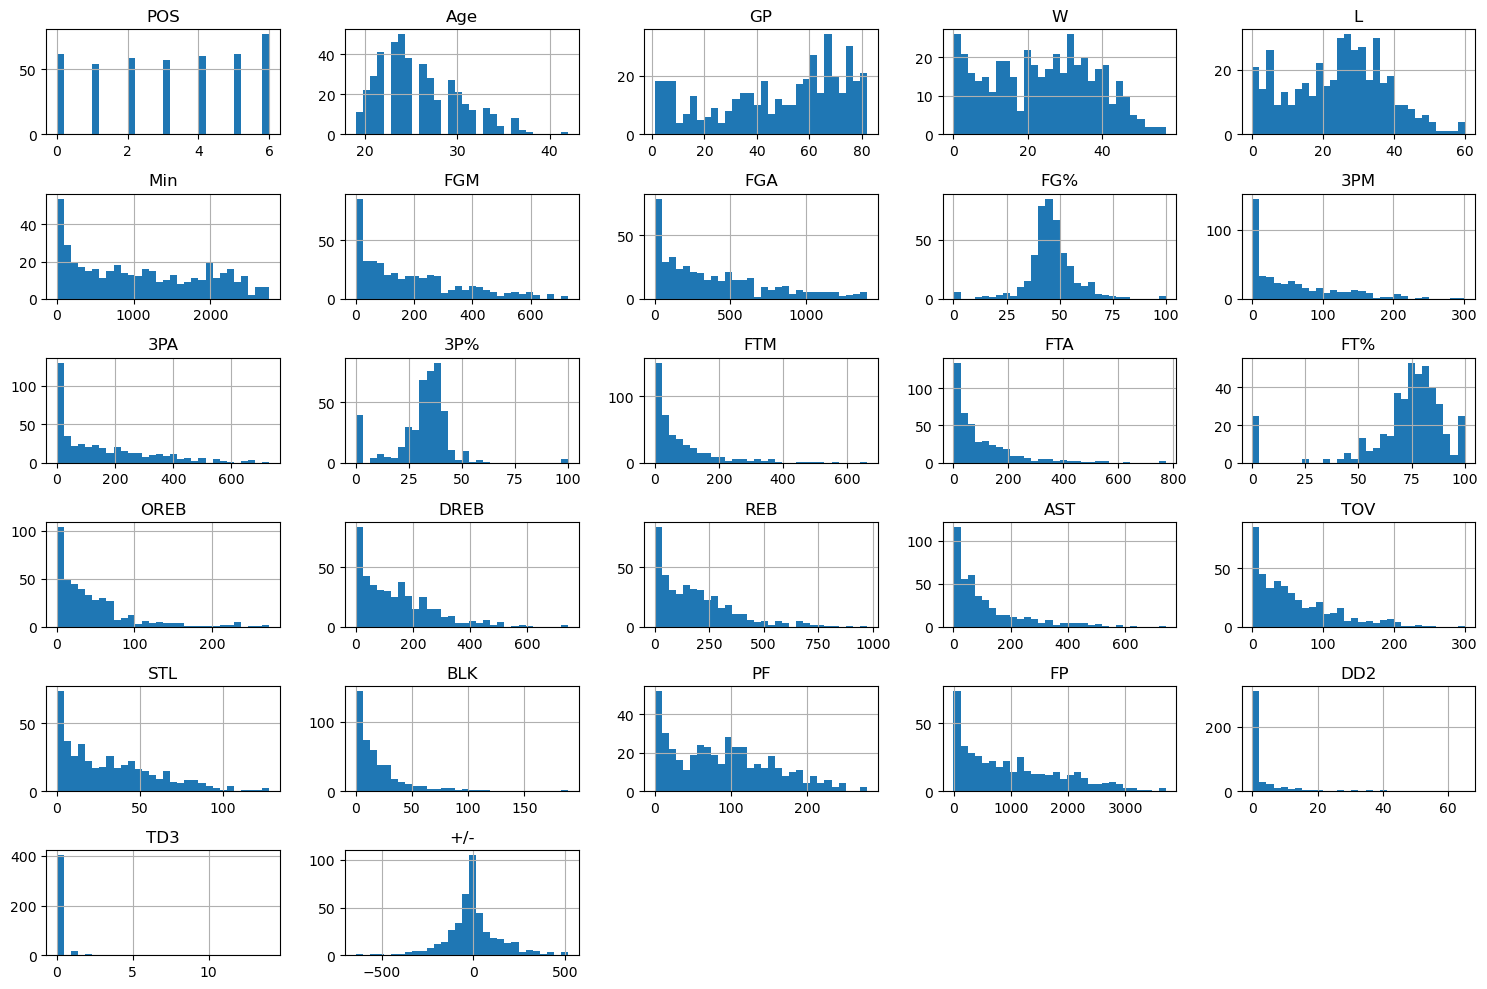

In [204]:
X_train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Vemos distribuciones de todo tipo aunque, la mayoria tiene un sesgo a la derecha. Es necesario que corrijamos esto para mejorar el desempeño de nuestro modelo de regresión. Sin embargo, tenemos muchas features todavia y puede que algunas no nos sirvan de mucho para conseguir el resultado de la variable objetivo, veamos cuales son las más útiles.

In [205]:
co= X_train.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,POS,Age,GP,W,L,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
POS,1.00,0.07,0.30,0.29,0.24,0.34,0.29,0.36,-0.17,0.49,0.49,0.28,0.21,0.18,0.21,-0.18,0.03,-0.03,0.35,0.27,0.40,-0.13,0.18,0.26,-0.15,0.07,0.10
Age,0.07,1.00,0.10,0.18,-0.01,0.12,0.10,0.09,0.09,0.12,0.10,0.13,0.11,0.10,0.13,0.03,0.12,0.10,0.15,0.09,0.08,0.04,0.07,0.12,0.09,0.03,0.24
GP,0.30,0.10,1.00,0.89,0.88,0.88,0.73,0.73,0.26,0.62,0.64,0.19,0.55,0.57,0.39,0.58,0.73,0.72,0.59,0.68,0.75,0.54,0.85,0.78,0.34,0.13,0.11
W,0.29,0.18,0.89,1.00,0.56,0.79,0.68,0.67,0.24,0.60,0.61,0.18,0.51,0.52,0.34,0.51,0.67,0.65,0.55,0.61,0.69,0.49,0.75,0.72,0.34,0.16,0.42
L,0.24,-0.01,0.88,0.56,1.00,0.76,0.62,0.62,0.22,0.50,0.53,0.15,0.47,0.49,0.34,0.51,0.62,0.61,0.48,0.60,0.64,0.47,0.76,0.66,0.25,0.06,-0.25
Min,0.34,0.12,0.88,0.79,0.76,1.00,0.92,0.92,0.21,0.76,0.78,0.19,0.75,0.76,0.35,0.58,0.83,0.79,0.77,0.86,0.86,0.55,0.88,0.95,0.49,0.22,0.20
FGM,0.29,0.10,0.73,0.68,0.62,0.92,1.00,0.99,0.21,0.73,0.75,0.16,0.87,0.87,0.32,0.53,0.81,0.76,0.78,0.91,0.77,0.51,0.77,0.97,0.59,0.30,0.24
FGA,0.36,0.09,0.73,0.67,0.62,0.92,0.99,1.00,0.13,0.80,0.83,0.20,0.85,0.84,0.34,0.44,0.75,0.69,0.80,0.91,0.78,0.43,0.75,0.95,0.51,0.27,0.21
FG%,-0.17,0.09,0.26,0.24,0.22,0.21,0.21,0.13,1.00,-0.06,-0.07,0.11,0.18,0.21,0.10,0.45,0.33,0.38,0.08,0.18,0.14,0.39,0.30,0.25,0.26,0.06,0.07
3PM,0.49,0.12,0.62,0.60,0.50,0.76,0.73,0.80,-0.06,1.00,0.99,0.36,0.54,0.50,0.36,0.08,0.44,0.35,0.61,0.64,0.65,0.15,0.54,0.68,0.14,0.09,0.22


Vemos correlaciones muy fuertes pero hay que profundizar un poco más para conocer cuales vale la pena eliminar. Esto lo haremos a través del indice de un RFE. 

In [206]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)

In [ ]:
fit = rfe.fit(X_train, y_train)

Estas son las variable que el método Wrapper seleccionó:

In [208]:
X_train.loc[:, fit.support_]

,Age,GP,W,L,FGA,FG%,3PA,3P%,FTA,DREB,REB,AST,PF
485,25,17,13,4,19,42.1,9,33.3,3,11,17,4,9
460,21,29,16,13,43,41.9,17,11.8,5,14,18,18,13
249,25,64,38,26,364,42.3,243,36.6,43,119,139,67,104
245,30,42,23,19,403,39.7,212,33.0,79,112,128,146,99
31,23,69,40,29,1129,46.2,412,41.0,321,157,185,538,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,24,16,10,6,23,39.1,7,14.3,2,7,12,2,2
67,21,77,38,39,1016,45.6,224,28.1,246,333,512,371,170
264,21,43,18,25,251,63.7,0,0.0,97,211,304,18,94
112,24,57,26,31,613,52.5,225,35.6,195,377,497,132,159


Veamos las correlaciones: 

In [210]:
co= X_train.loc[:, fit.support_].corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,Age,GP,W,L,FGA,FG%,3PA,3P%,FTA,DREB,REB,AST,PF
Age,1.00,0.10,0.18,-0.01,0.09,0.09,0.10,0.13,0.10,0.12,0.10,0.15,0.07
GP,0.10,1.00,0.89,0.88,0.73,0.26,0.64,0.19,0.57,0.73,0.72,0.59,0.85
W,0.18,0.89,1.00,0.56,0.67,0.24,0.61,0.18,0.52,0.67,0.65,0.55,0.75
L,-0.01,0.88,0.56,1.00,0.62,0.22,0.53,0.15,0.49,0.62,0.61,0.48,0.76
FGA,0.09,0.73,0.67,0.62,1.00,0.13,0.83,0.20,0.84,0.75,0.69,0.80,0.75
FG%,0.09,0.26,0.24,0.22,0.13,1.00,-0.07,0.11,0.21,0.33,0.38,0.08,0.30
3PA,0.10,0.64,0.61,0.53,0.83,-0.07,1.00,0.34,0.54,0.46,0.37,0.64,0.57
3P%,0.13,0.19,0.18,0.15,0.20,0.11,0.34,1.00,0.08,0.03,-0.03,0.17,0.11
FTA,0.10,0.57,0.52,0.49,0.84,0.21,0.54,0.08,1.00,0.71,0.68,0.70,0.65
DREB,0.12,0.73,0.67,0.62,0.75,0.33,0.46,0.03,0.71,1.00,0.99,0.58,0.83


2. **Visualización, exploración, preparación y análisis de datos:** 
- Extracción de información estadística básica en los datos analizados.
- En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, distribución de datos, etc.)
- Limpieza de datos
- En esta fase de debe mencionar y mostrar el proceso y decisiones tomadas para procesar y limpiar estos datos. 
- Se deben incluir gráficos interesantes que muestren el comportamiento de los datos y cómo se relacionan, así como acompañar los gráficos con una explicación de lo que se observa en el gráfico.  



#### Clasificación

1. **Definición del problema**. El estudiante debe definir un problema a ser resuelto, basado en la selección de un conjunto de datos de un problema que sea de su interés. Es importante que los datos seleccionados correspondan a un problema de **clasificación** de forma que cumpla con el objetivo de la sección de este proyecto. Si la selección de los datos es complicada, como sugerencia pueden tomar el que sea de su interés de las siguientes páginas:

http://archive.ics.uci.edu/ml/

https://www.kdnuggets.com/datasets/index.html

https://www.kaggle.com/datasets

https://data.world/

NOTA: Si tienes alguna duda sobre si el dataset elegido es el correcto para el problema a resolver de regresión me puedes consultar y lo analizamos. 

2. **Visualización, exploración, preparación y análisis de datos:** 
- Extracción de información estadística básica en los datos analizados.
- En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, distribución de datos, datos imbalanceados en la variable de salida, etc.)
- Limpieza de datos
- En esta fase de debe mencionar y mostrar el proceso y decisiones tomadas para procesar y limpiar estos datos. 
- Se deben incluir gráficos interesantes que muestren el comportamiento de los datos y cómo se relacionan, así como acompañar los gráficos con una explicación de lo que se observa en el gráfico.  

 

### Engrega 2:

En esta fase se debe entregar lo que se hizo en la entrega 1 con sus respectivas correcciones más los siguientes puntos:

#### Regresión 


3. **Procesar modelo de regresión:** 
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de regresión para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (MSE, MAE, R2) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos. 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 


#### Clasificación

3. **Procesar modelo de regresión:** 
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de clasificación para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (precision, recall, accuracy, f1 score, etc.) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos. 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 

#### Entrega 3

 - Imagina que le estás presentando tu proyecto a tu jefe (tu jefe no es una persona muy técnica que sepa mucho de código) 
 - Sabiendo esto, en esta entrega se pide hacer una presentación donde hables sobre todo lo interesante que viste en tu proyecto, trata de hacer la presentación lo más entendible posible para que tu jefe comprenda todo lo que tuviste que hacer desde un inicio así como los resultados. (No puedes mostrar código, tiene que ser visual y mostrar resultados). 
 - En esta fase se pide entregar las correcciones sugeridas de las dos entregas pasadas. 


### Calificación

La calificación de cada fase del proyecto incluido en el reporte final es la siguiente:

| Fase | Puntuación | Características Generales |
| --- | --- | --- |
| Definición del problema | 15% | 1. Mencionar el origen de los datos <br /> 2.Dar contexto de los datos (significado de las variables si es posible) <br /> 3. Describir de qué se trata el problema a resolver|
| Preparación de datos | 30% | 1. Incluya **gráficos** y métricas utilizadas para describir la base de datos. <br /> 1. Describir el tratamiento de variables que requieren transformación o modificación de valores. |
| Procesar modelo de regresión/clasificación | 40% | 1. Describir el modelo aplicado. <br /> 2. Evaluar el desempeño de cada modelo utilizando métricas comunes para poder realizar la comparación. <br /> 3. Pruebe los modelos utilizando datasets en común para que la comparación sea válida 4. Aplicación del modelo para predecir datos nuevos|
| Discusión de los resultados | 15% | 1. Resalte sus observaciones validadas por las métricas que se muestran dentro del desarrollo. <br /> 2. Dar conclusión personal de los resultados y el uso o aplicación de los modelos. |

### ¿ Qué debe tener cada entregable?


- El informe del trabajo realizado se entregará digitalmente en un documento elaborado en una computadora (no fotografías de hojas o cuadernos), e incluirá como mínimo:
    - Nombre y apellidos de los alumnos.
    - Es obligatorio que incluyan el código que generaron para realizar la práctica.
    - Es obligatorio que incluyan los archivos que contengan los datos a analizar para cada problema (regresión y clasificación)
